In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/Mobile_train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [19]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

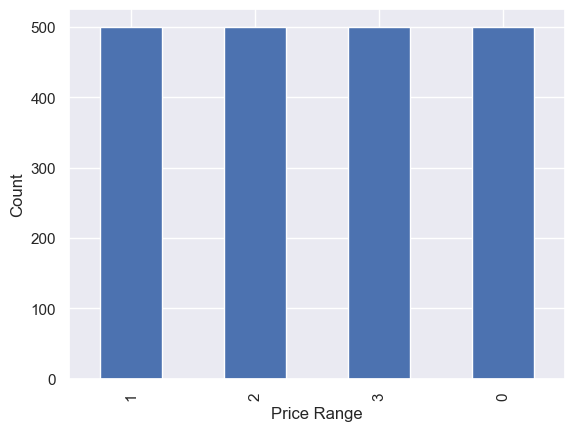

In [10]:
sns.set()
price_plot = df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()    

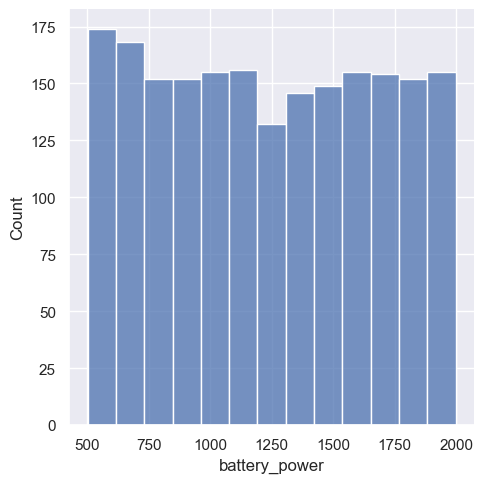

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["battery_power"])
plt.show()

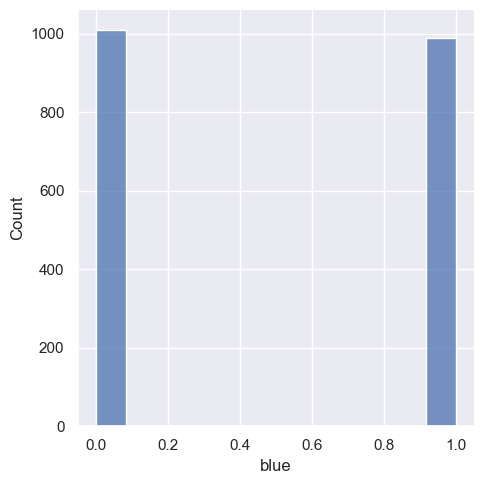

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df['blue'])
plt.show()

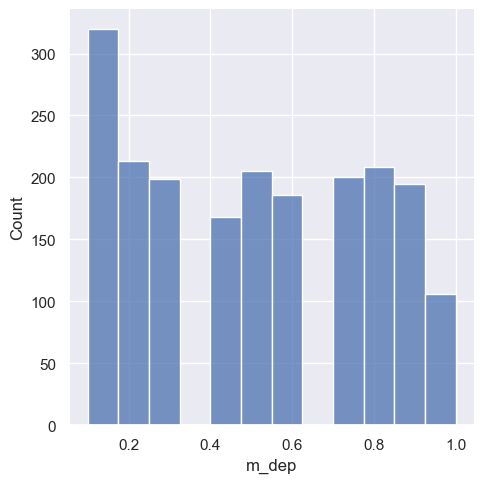

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df['m_dep'])
plt.show()

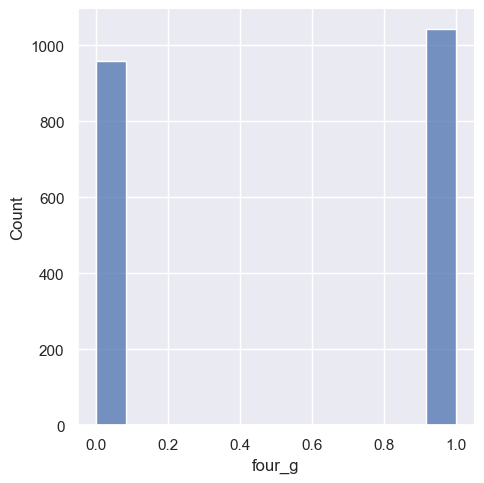

In [16]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df['four_g'])
plt.show()

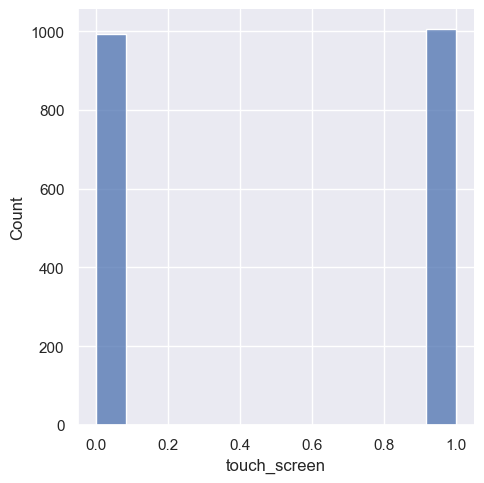

In [17]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df['touch_screen'])
plt.show()

In [18]:
X = df.drop(['price_range'],axis=1)
y = df['price_range']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rand = RandomForestClassifier(n_estimators=200,random_state=10)

In [30]:
rand.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=10)

In [32]:
y_pred = rand.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_pred))

0.8825


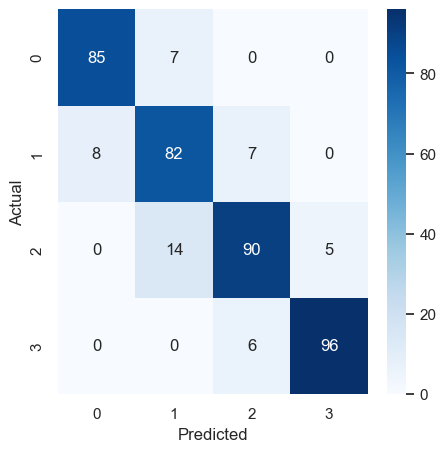

In [41]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

svm_clf.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [43]:
y_pred_svm = svm_clf.predict(X_test)

In [44]:
print(accuracy_score(y_test,y_pred_svm))

0.94


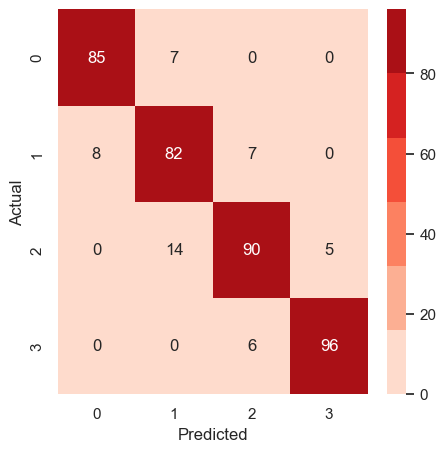

In [51]:
cmv = confusion_matrix(y_test, y_pred)
red_cmap = sns.color_palette("Reds")
sns.heatmap(cmv, annot=True, fmt='d',cmap=red_cmap)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()